In [92]:
#Import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [93]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
#shape of train data
train.shape

(1460, 81)

In [95]:
#checking the info train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Checking the Missing values

In [96]:
#Let's check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

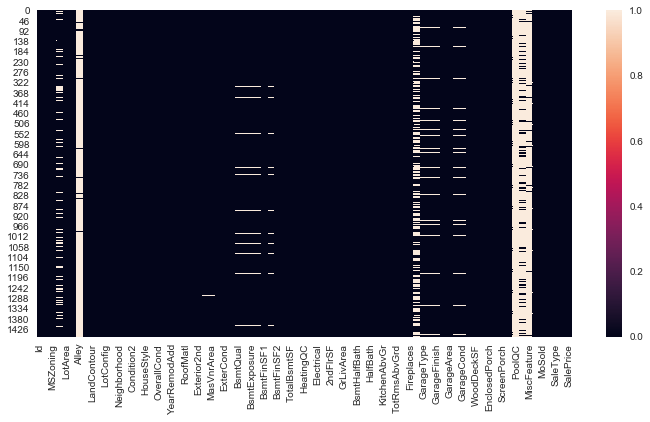

In [97]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [98]:
#missing value counts in each of these columns in percentages
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

# Visualising Missing Values Percentages

In [99]:
#Convert into dataframe
Isnull = Isnull.to_frame()
Isnull.columns = ['count']

In [100]:
Isnull.columns = ['count']

In [101]:
Isnull.index.names = ['Name']


In [102]:
Isnull['Name'] = Isnull.index

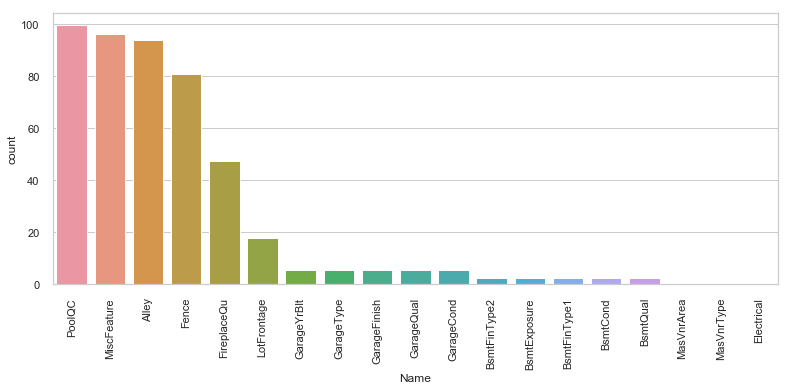

In [103]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

# Missing Values Treatment

In [104]:
## By checking the missing value plot we can say columns like PoolQC,MiscFeature,Alley,Fence can be dropped as
## they have missing values more than 80%
train.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

In [105]:
# Rest columns we can fill them by mean,median,mode(mean for Numerical Columns,mode for Categorical Columns)
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [106]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [107]:
## As we can see we cn drop ID column
train.drop(['Id'],axis=1,inplace=True)

In [108]:
train.shape

(1460, 76)

In [109]:
# CHecking if there are any missing values left
train.columns[train.isnull().any()]

Index(['MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageYrBlt'],
      dtype='object')

In [110]:
# Treatment for Rest Missing values which were Less as compared to previous one
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())




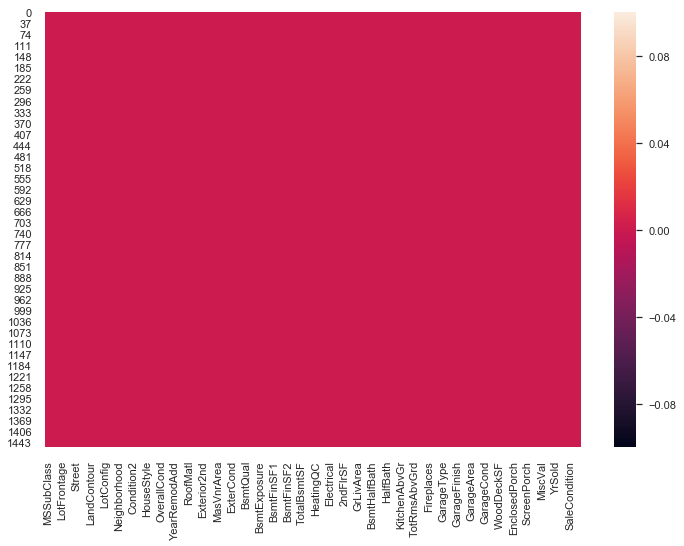

In [111]:
#plot of missing value attributes
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull())
plt.show()

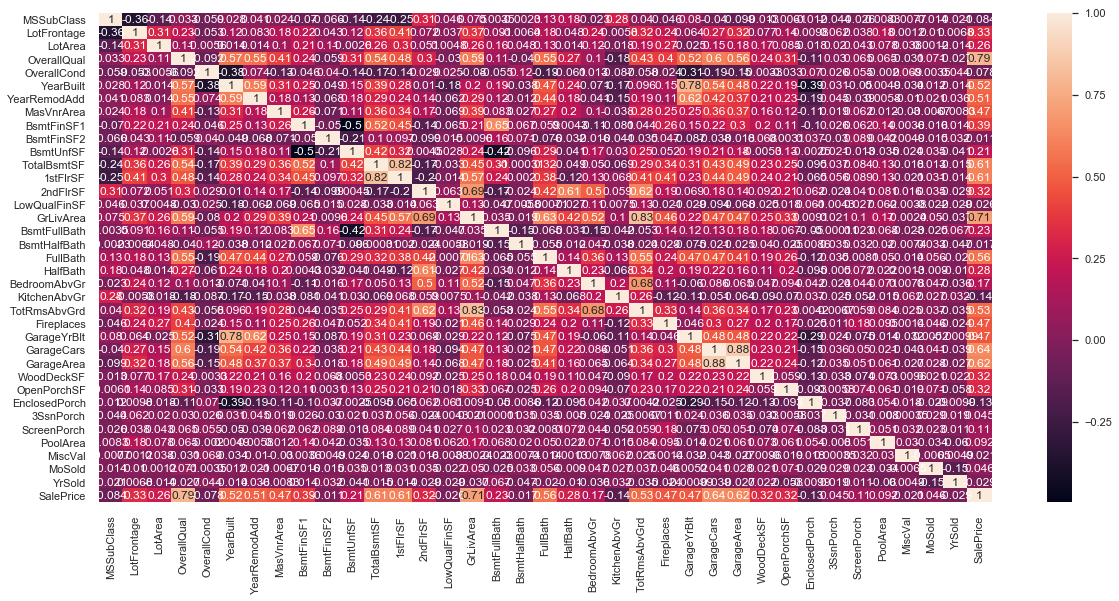

In [112]:
#Coralation plot
corr = train.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

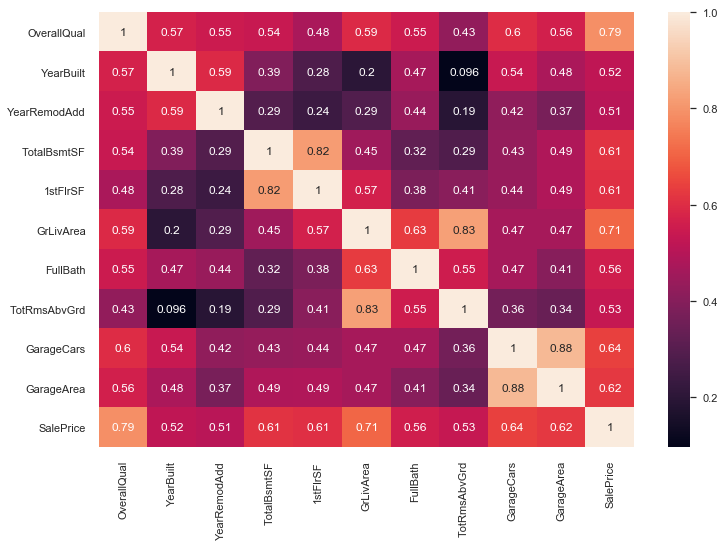

In [113]:
# we will see heatmap for more than 0.5 correlation
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# Checking Target Variable is Normal Fitted

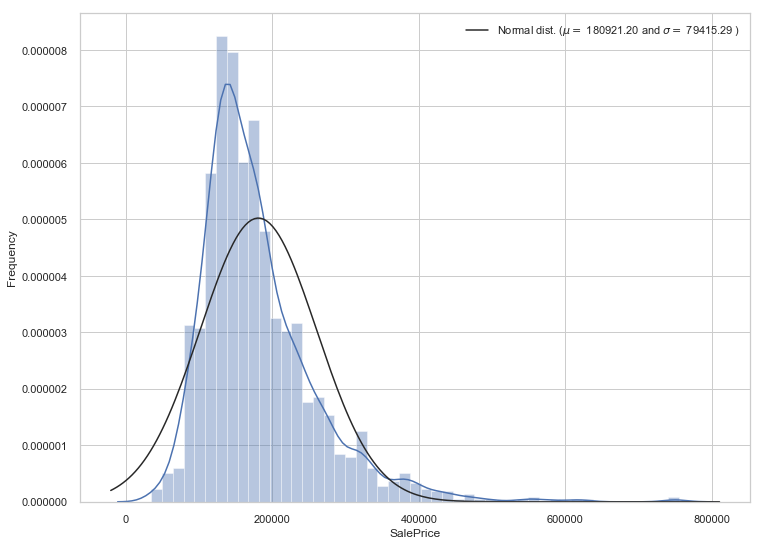

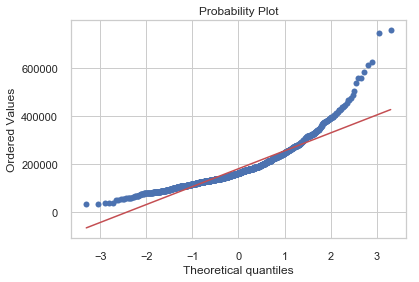

In [114]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Here we use Log Transform for Target Variable for Normal Distribution

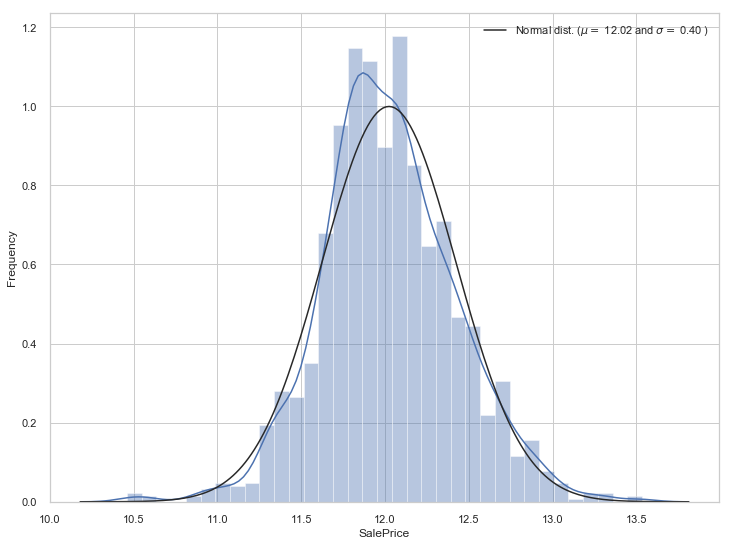

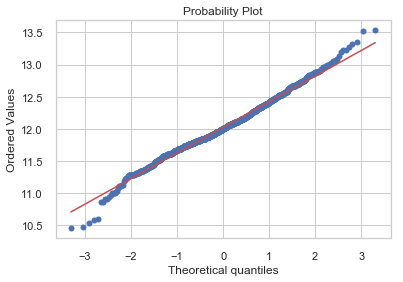

In [115]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# All Missing Values Treatment is done So now no Missing values in the Dataset We are ready for next process

# Now we can Do the One Hot Encoder for Categorical Variables as there are too many Categorical Variables

In [116]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [117]:
len(columns)

39

In [118]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [119]:
final_df=train.copy()

In [120]:
final_df.shape

(1460, 76)

# Now Combining Test Data with Train data as test data as wee will do the combine one hot encoding to both

In [121]:
## Combine Test Data 

test=pd.read_csv('formulatedtest.csv')

In [122]:
test.shape

(1459, 74)

In [123]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [124]:
final_df=pd.concat([train,test],axis=0)

In [125]:
final_df['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1429          NaN
1430          NaN
1431          NaN
1432          NaN
1433          NaN
1434          NaN
1435          NaN
1436          NaN
1437          NaN
1438          NaN
1439          NaN
1440          NaN
1441          NaN
1442          NaN
1443          NaN
1444          NaN
1445          NaN
1446          NaN
1447          NaN
1448          NaN
1449          NaN
1450          NaN
1451          NaN
1452          NaN
1453      

In [126]:
final_df.shape

(2919, 76)

In [127]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [128]:
final_df.shape

(2919, 237)

# Splitting into train and test data after One Hot Encoding

In [129]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [130]:
final_df.shape

(2919, 177)

In [131]:
final_df.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFullBath        0
BsmtHalfBath        0
BsmtUnfSF           0
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          0
GarageCars          0
GarageYrBlt      1459
GrLivArea           0
HalfBath            0
KitchenAbvGr        0
LotArea             0
LotFrontage         0
LowQualFinSF        0
MSSubClass          0
MasVnrArea          0
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
                 ... 
Stucco              0
VinylSd             0
Wd Sdng             0
WdShing             0
Brk Cmn             0
CmentBd             0
Other               0
Wd Shng             0
None                0
GasA                0
GasW                0
Grav                0
OthW                0
Wall                0
Y         

In [132]:
final_df.drop(columns=['GarageYrBlt'],axis=1,inplace=True)

In [133]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

# Splitting Train and Test data for df_Train

In [134]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [135]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [136]:
df_Train.shape

(1460, 176)

In [137]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [138]:
df_Test.shape

(1459, 175)

In [139]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


# Linear Regression

In [140]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [141]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
y_pred=model.predict(df_Test)

In [143]:
y_pred=np.exp(y_pred)
y_pred

array([128015.90788951, 153141.12860913, 182556.12857469, ...,
       167767.56642991, 116413.57841684, 226087.11733393])

# GradientBoostingRegressor

In [144]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [145]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [146]:
y_pred1=GBR.predict(df_Test)

In [147]:
y_pred1=np.exp(y_pred1)
y_pred1

array([121522.37029411, 146397.3569119 , 182525.24850188, ...,
       166794.43320391, 116744.36805878, 245354.80312627])

In [57]:
y_pred1.dtype

dtype('float64')

In [177]:
y_pred1

array([121522.37029411, 146397.3569119 , 182525.24850188, ...,
       166794.43320391, 116744.36805878, 245354.80312627])

In [59]:
# sub=pd.read_csv('sample_submission.csv')
# sub

In [60]:
# sub.drop(columns=['SalePrice'],axis=1,inplace=True)

In [61]:
# sub['SalePrice']=array

In [62]:
# sub

In [63]:
# sub.to_csv('submission1',index=False)

# Lasso Regression

# Selecting Alpha Value for Best Possible Low Errors for Lasso Regression

In [148]:
from sklearn.linear_model import Lasso

In [149]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score



In [150]:
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete

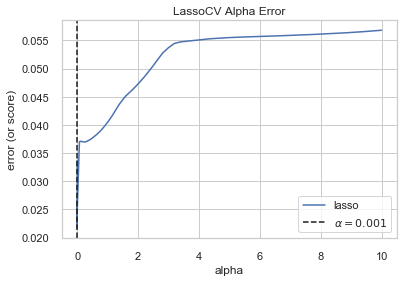

In [151]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

# Lasso Regression with alpha=0.001

In [152]:
myModel=Lasso(alpha=0.001).fit(X_train,y_train)

In [153]:
y_pred2=myModel.predict(df_Test)

In [154]:
y_pred2=np.exp(y_pred2)
y_pred2

array([116338.27892301, 135187.41755319, 172063.78742496, ...,
       161133.36315809, 121513.74670895, 239415.28604594])

In [155]:
sub=pd.read_csv('sample_submission.csv')


In [156]:
sub.drop(columns=['SalePrice'],axis=1,inplace=True)

In [157]:
array1=np.array(y_pred2)

In [170]:
array1

array([116338.27892301, 135187.41755319, 172063.78742496, ...,
       161133.36315809, 121513.74670895, 239415.28604594])

In [173]:
sub['SalePrice']=array1

In [174]:
sub.head()

,Id,SalePrice
0,1461,116338.278923
1,1462,135187.417553
2,1463,172063.787425
3,1464,196769.988347
4,1465,198789.356206


In [175]:
sub.to_csv('submission2',index=False)

# Random Forest Regressor

In [160]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=1000)

In [161]:
#Fit
model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [162]:
y_pred_random_forest=model.predict(df_Test)

In [163]:
y_pred_random_forest

array([11.67130891, 11.83635406, 12.0580338 , ..., 11.97509386,
       11.69818718, 12.3863912 ])

In [164]:
pred_random_forest=np.exp(y_pred_random_forest)

In [165]:
array4=np.array(pred_random_forest)

In [171]:
array4

array([117161.53610549, 138185.74779194, 172479.52226744, ...,
       158751.26116113, 120353.33874208, 239519.76127252])

In [166]:
sub=pd.read_csv('sample_submission.csv')
sub.drop(columns=['SalePrice'],axis=1,inplace=True)
sub['SalePrice']=array4
sub.to_csv('submission3',index=False)

In [172]:
sub.head()

,Id,SalePrice
0,1461,117161.536105
1,1462,138185.747792
2,1463,172479.522267
3,1464,196283.511936
4,1465,202304.413572


# Conclusions

Firstly The Target Variable was Skewed so I applied Log transform to make SalePrice a Normal Distributed Attribute as it is 
Target Variable

Missing Values Treatment Done,in this I removed Features who had more than 80% missing values and rest of them 
i filled them with mean for continuous features and mode for Categorical Features

Now Treatment of Categorical Columns
1)By applying Label Encoding,we might confuse our model into thinking that a column has data with some kind of order or hierarchy when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.
2)The model may derive a correlation like as the Column number increases the Target Variable  increases but this clearly may not be the scenario in some other data or the prediction set So we used here One Hot Encoder

Then we merged Train and Test data because there were new values in Test data which were not familiar with 
Train data so we Concat train and test data and split them into again a different Train and Test Data for Algorithm
Predicitions

Then we Applied Various Algorithm like Linear Regression,Gradient Boosting Regressor,Lasso Regression,Random FOrest Regressor
where I got the Highest Rank of 1782 out of 4883 on the Random Forest Regressor as i got better Rank with Ensemble Methods

# Lasso Regression Conclusions

In [178]:
coef = pd.Series(myModel.coef_, index = X_train.columns)

In [179]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 70 variables and eliminated the other 105 variables


Good job Lasso. One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.